## Generating Random Terrain for RL Training

In [10]:
%load_ext autoreload
%autoreload 2

from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create Random Terrain

In [34]:
%%time
np.random.seed(0)
n_cells  = 222
n_rivers = 10
g = Graph(N=n_cells, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=n_rivers, min_height=0.9)
g.assign_moisture()
g.assign_biomes()

CPU times: user 7.24 s, sys: 10.8 ms, total: 7.25 s
Wall time: 7.26 s


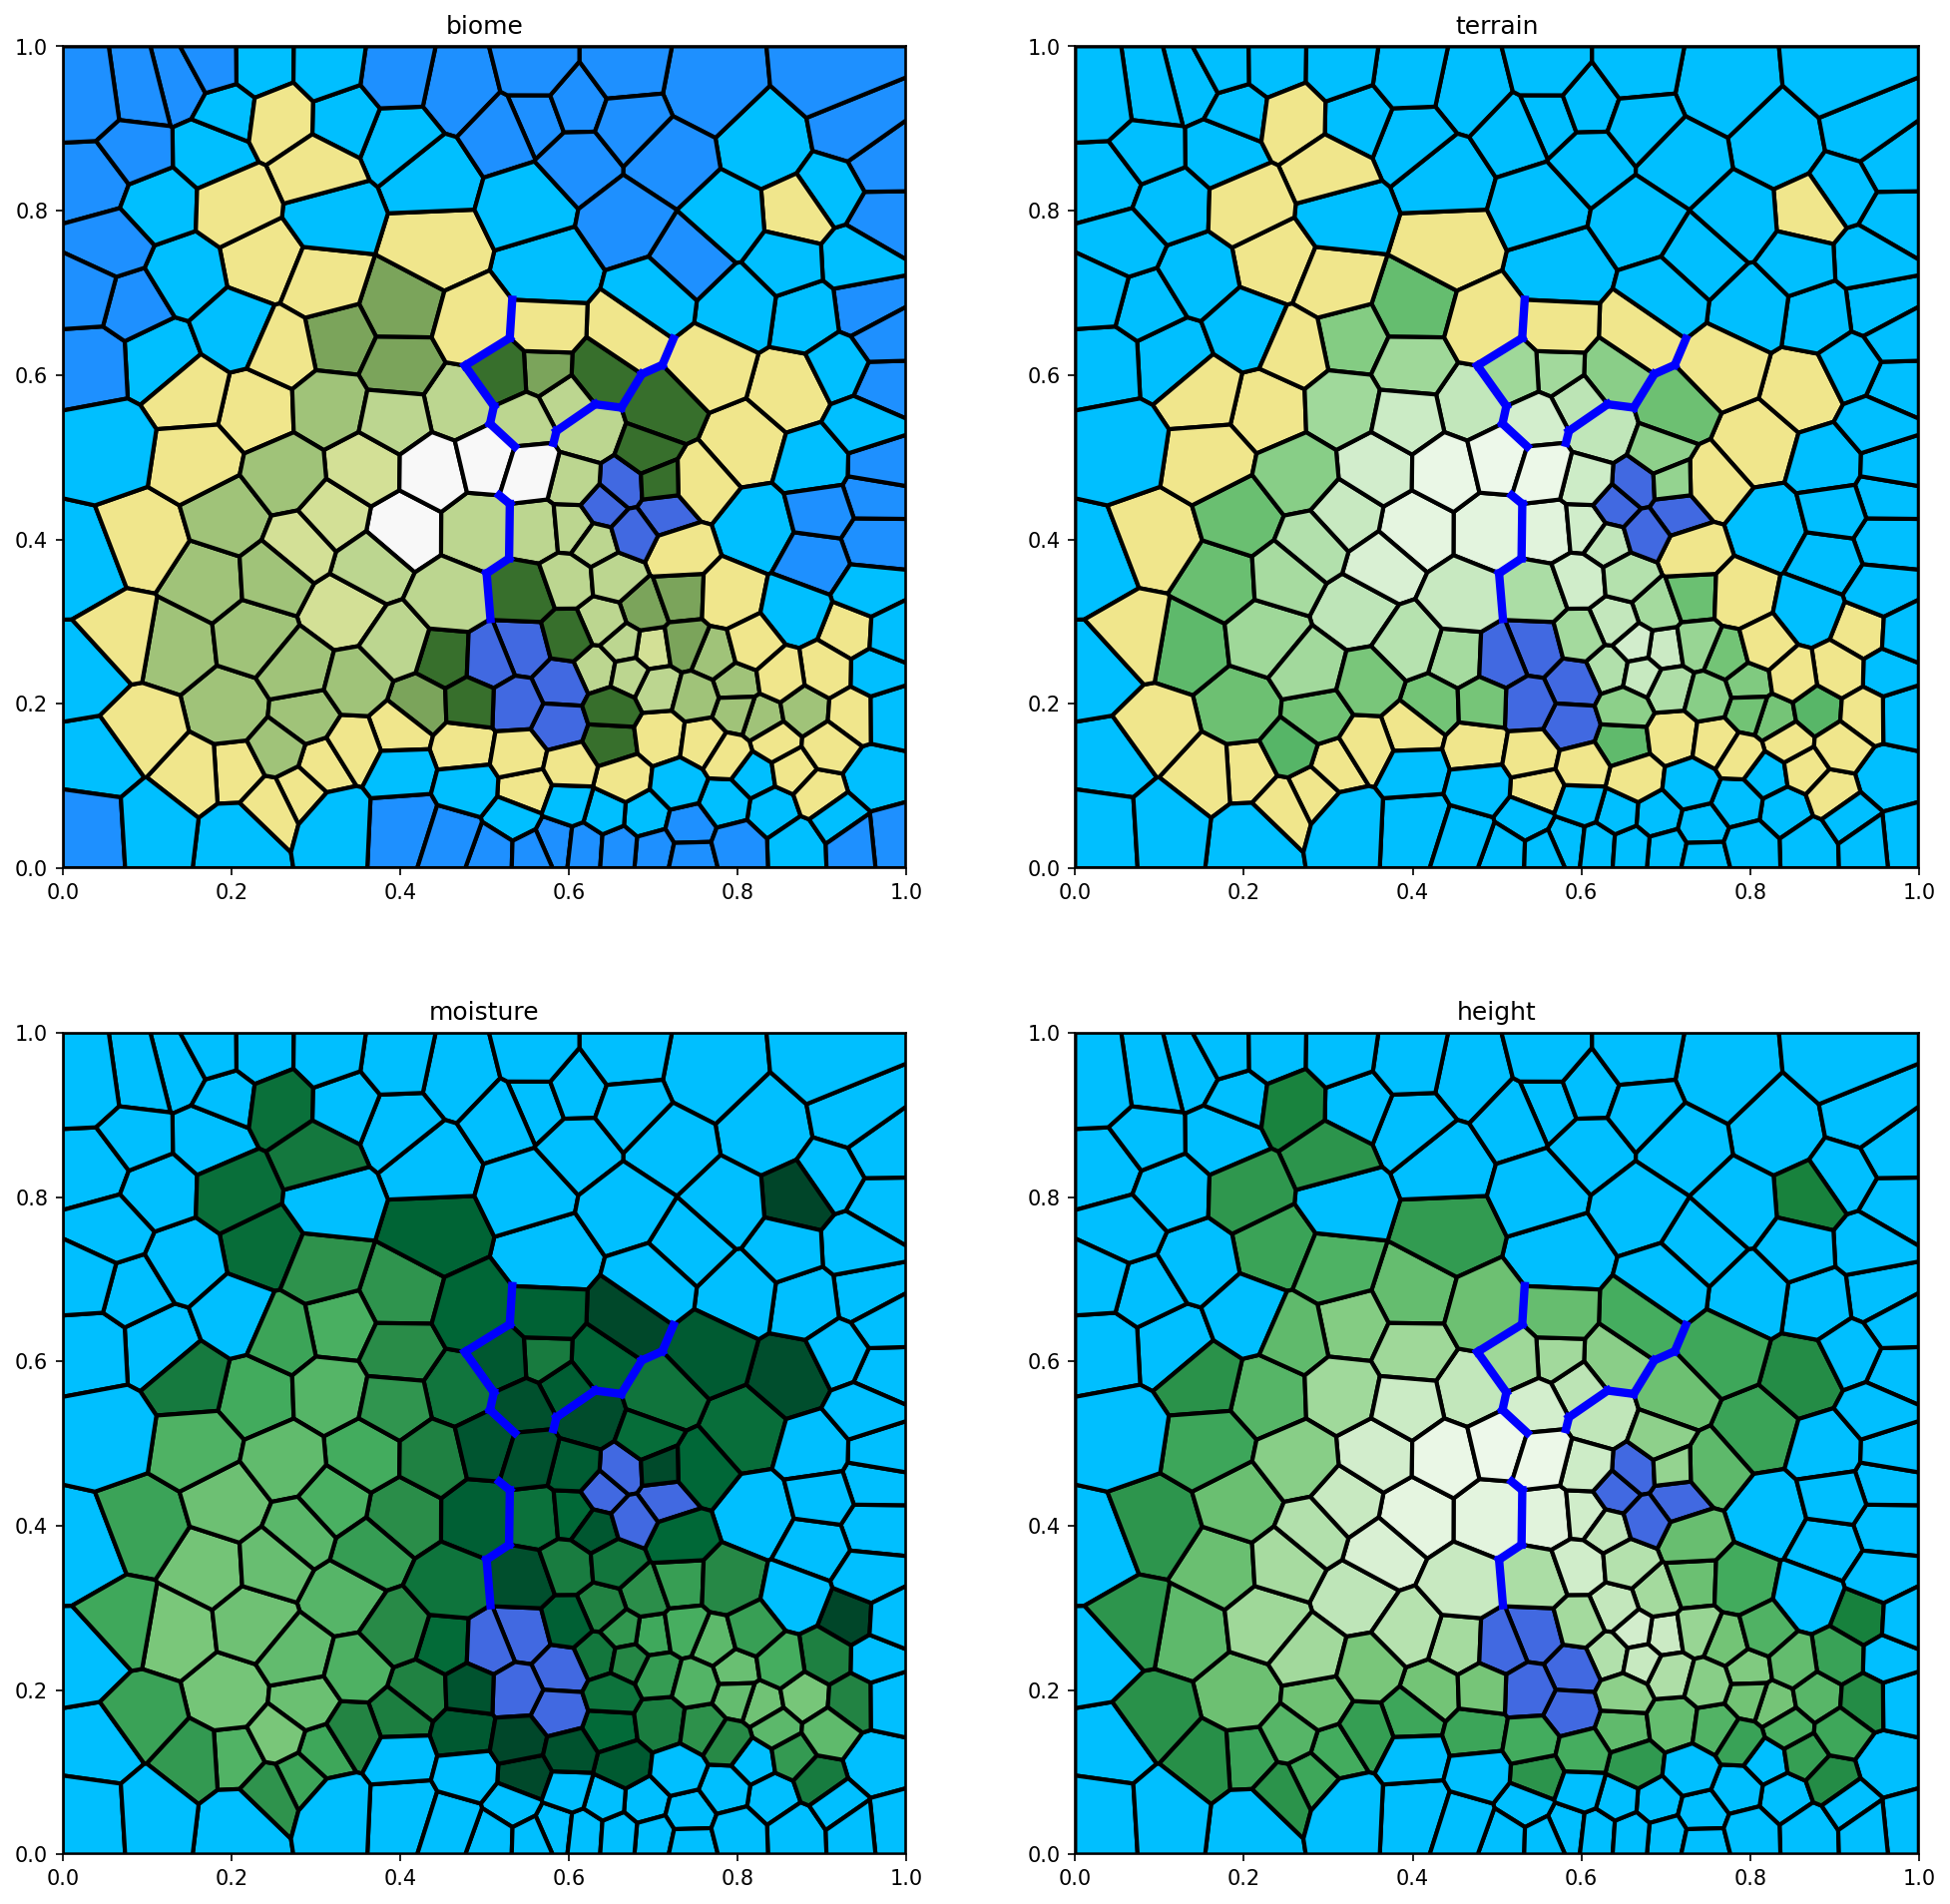

In [35]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,16),dpi=150)
ax = ax.flatten()

plot_type = ['biome', 'terrain', 'moisture', 'height']

for i, p_type in enumerate(plot_type):
    g.plot_full_map(
        plot_type=p_type,
        debug_height=False, 
        debug_moisture=False, 
        downslope_arrows=False, 
        rivers=True,
        ax = ax[i])
    ax[i].set_title(p_type)


### Export as Polygons

Polygon should be a dict with fields:
- 'id'
- 'polygon'
- 'tags'
- 'displayName'


eg.

```
"id" : "terrain-7",
"polygon": [[30, 120], [170, 30], [170, 0], [30, 0]],
"tags": ["location", "zone", "water"],
"displayName" : "Water"
```            

In [13]:
# Get Polygons coordinates
borders  = [g._center_to_polygon(center, 'biome').get_xy() for center in g.centers]
biomes   = [center.biome.name for center in g.centers]
terrains = [center.terrain_type.name for center in g.centers]
print(f"Biomes:\n {set(biomes)}")
print(f"Terrains:\n {set(terrains)}")

Biomes:
 {'TEMPERATE_DECIDOUS_FOREST', 'OCEAN', 'TEMPERATE_RAIN_FOREST', 'TAIGA', 'GRASSLAND', 'COAST', 'LAKE', 'DEEPOCEAN', 'SHRUBLAND', 'SNOW'}
Terrains:
 {'COAST', 'OCEAN', 'LAKE', 'LAND'}


In [14]:
def make_terrain_list(borders, biomes):
    """Creates a list of dictionaries with terrain data"""
    terrain_list = []
    for i in range(len(borders)):
        terrain_dict = { 'id'           : f"terrain-{i}",
                         'polygon'      : borders[i],
                         'tags'         : ["location", "zone", biomes[i]],
                         'display_name' : biomes[i]}
        terrain_list += [terrain_dict]
    return terrain_list

t_list = make_terrain_list(borders,biomes)
t_list[0]

{'id': 'terrain-0',
 'polygon': array([[0.63675468, 0.74682729],
        [0.61389671, 0.78171472],
        [0.54588649, 0.76938571],
        [0.53545678, 0.75195146],
        [0.53880447, 0.72981521],
        [0.57546704, 0.69232904],
        [0.60339032, 0.68865786],
        [0.62928575, 0.71382584],
        [0.63675468, 0.74682729]]),
 'tags': ['location', 'zone', 'OCEAN'],
 'display_name': 'OCEAN'}